In [1]:
# 한글 폰트를 사용하기 위한 툴
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
!apt-get update -qq
!apt-get install fonte-nanum* -qq

import matplotlib.font_manager as fm
fm._rebuild()

# 한글 폰트 확인하기
for fontInfo in fm.fontManager.ttflist:
  if 'Nanum' in fontInfo.name:
    print(fontInfo.name + ' = '+fontInfo.fname)

plt.rc('font', family = 'NanumGothic')

E: Unable to locate package fonte-nanum*
E: Couldn't find any package by glob 'fonte-nanum*'
E: Couldn't find any package by regex 'fonte-nanum*'


# 데이터 불러오기

In [52]:
# 패키지 불러오기
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype
from scipy import stats
from scipy.stats import f_oneway
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import datetime
from sklearn.metrics import mean_squared_error , r2_score
import statsmodels.api as sm
import scipy
from scipy.stats import norm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.plot import plot_plotly, plot_components_plotly
from sklearn.model_selection import ParameterGrid
from matplotlib import pyplot


import warnings
warnings.filterwarnings('ignore')

# 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/sd솔데스크/팀 프로젝트/Proj_WT/DataSets/airpolution/final_final.csv')

In [45]:
df = df.drop(['송파구'], axis = 1)

In [53]:
df

,측정일시,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
0,2021-01-01,21.0,29.0,32.0,25.0,21.0,25.0,23.0,28.0,29.0,21.0,22.0,26.0,22.0,20.0,21.0,22.0,23.0,24.0,27.0,22.0,32.0,22.0,30.0,29.0,26.0
1,2021-01-02,25.0,34.0,37.0,31.0,25.0,27.0,30.0,32.0,32.0,27.0,26.0,32.0,26.0,24.0,30.0,25.0,26.0,28.0,31.0,25.0,41.0,30.0,34.0,34.0,30.0
2,2021-01-03,30.0,42.0,45.0,38.0,31.0,35.0,37.0,39.0,40.0,30.0,30.0,39.0,31.0,28.0,31.0,30.0,32.0,34.0,39.0,30.0,47.0,32.0,39.0,41.0,36.0
3,2021-01-04,32.0,44.0,43.0,41.0,31.0,33.0,39.0,41.0,42.0,33.0,32.0,39.0,32.0,27.0,36.0,33.0,35.0,37.0,40.0,33.0,46.0,31.0,40.0,43.0,36.0
4,2021-01-05,23.0,29.0,31.0,27.0,23.0,24.0,30.0,30.0,32.0,21.0,23.0,30.0,22.0,20.0,28.0,24.0,27.0,23.0,29.0,26.0,34.0,25.0,30.0,29.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,2021-07-28,34.0,28.0,32.0,37.0,37.0,31.0,24.0,37.0,28.0,29.0,30.0,38.0,31.0,24.0,31.0,31.0,32.0,32.0,37.0,33.0,32.0,27.0,28.0,34.0,32.0
209,2021-07-29,50.0,46.0,45.0,46.0,49.0,48.0,39.0,45.0,44.0,43.0,46.0,48.0,45.0,35.0,46.0,47.0,48.0,53.0,48.0,46.0,47.0,41.0,43.0,52.0,50.0
210,2021-07-30,30.0,30.0,26.0,21.0,26.0,32.0,19.0,25.0,31.0,28.0,27.0,28.0,24.0,19.0,28.0,28.0,29.0,34.0,24.0,23.0,28.0,25.0,25.0,30.0,33.0
211,2021-07-31,24.0,21.0,22.0,20.0,25.0,22.0,15.0,21.0,22.0,23.0,22.0,25.0,22.0,16.0,22.0,23.0,21.0,24.0,24.0,23.0,23.0,19.0,21.0,26.0,26.0


# 정규성 검정하기

- H0 : 정규분포를 따른다.
- H1 : 정규분포를 따르지 않는다.

In [5]:
from scipy.stats import shapiro

# 정규성 검정하기
final_list = []
for i in df.columns[:-1]:
  if df[i].isnull().sum().sum() == 0:
    # 정규성 검정을 한다.
    stats, p_val = shapiro(df[i])
    if p_val > 0.05:
      # 값을 출력한다.
      final_list.append(i)

# 모든 column이 정규성 검정을 통과한다.
df.columns[:-1] == final_list

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

# 등분산 검정

- H0 : 분산이 같다.
- H1 : 분산이 다르다.

In [6]:
# 각 구의 분산이 같다.
import scipy.stats as stats
for i in df.columns[:-1]:
  for j in df.columns[:-1]:
    if i != j:
      p_val = stats.levene(df[i],df[j])
      if p_val[1] > 0.05:
        print(f'{i} and {j} and {p_val[1]}')

강남구 and 광진구 and 0.9689836683197186
강남구 and 노원구 and 0.5229583841452661
강남구 and 동작구 and 0.8025849659117401
강남구 and 마포구 and 0.5831069724945855
강남구 and 성동구 and 0.783265487344628
강남구 and 용산구 and 0.6608095246631467
강남구 and 중구 and 0.6262557483532898
강남구 and 중랑구 and 0.9899394160911383
광진구 and 강남구 and 0.9689836683197186
광진구 and 노원구 and 0.49926478740429325
광진구 and 동작구 and 0.8323550686005656
광진구 and 마포구 and 0.5582126010130966
광진구 and 성동구 and 0.754279310908654
광진구 and 용산구 and 0.6336890637699772
광진구 and 중구 and 0.6535439878839682
광진구 and 중랑구 and 0.9599332216389119
노원구 and 강남구 and 0.5229583841452661
노원구 and 광진구 and 0.49926478740429325
노원구 and 동작구 and 0.3859444801022256
노원구 and 마포구 and 0.9359964486898203
노원구 and 성동구 and 0.7173727463040457
노원구 and 용산구 and 0.8380547490288132
노원구 and 중구 and 0.2752660511483612
노원구 and 중랑구 and 0.5450991521956274
동작구 and 강남구 and 0.8025849659117401
동작구 and 광진구 and 0.8323550686005656
동작구 and 노원구 and 0.3859444801022256
동작구 and 마포구 and 0.43690570989856836
동작구 and 성동구 and 0.6063

# ANOVA 검정

- 1. 정규성 검정(통과)
- 2. 등분산 검정(통과)

### ANOVA를 시행한다.
- H0 : 평균의 차이가 없다.
- H1 : 평균의 차이가 있다.

In [7]:
df.columns

Index(['강남구', '광진구', '노원구', '동작구', '마포구', '성동구', '용산구', '중구', '중랑구', 'ds'], dtype='object')

In [8]:
# ANOVA를 통해서 평균에 차이가 있는지 확인한다.
fvalue, pvalue = stats.f_oneway(df['중구'], df['성동구'],df['노원구'],df['마포구'], df['중랑구'], df['용산구'], df['광진구'], df['강남구'], df['동작구'])
print(pvalue)
if pvalue < 0.05:
  print('ANOVA검정을 통해서 평균의 차이가 있다.')

0.040337962522856124
ANOVA검정을 통해서 평균의 차이가 있다.


# 사후검정

In [9]:
# from statsmodels.stats.multicomp import pairwise_tukeyhsd

# df_values = df.drop('ds', axis = 1).values
# labels = 

## 각 검증이 끝났으므로 ARIMA를 통해서 6월, 7월의 데이터로 8월 1~6일까지의 데이터를 예측해 보자.

In [10]:
# ADF test를 위한 함수
def adf_test(df, i):
    name=df.columns[i]
    df=df.iloc[:, i]

    result = adfuller(df.values)
    print(name)
    print('ADF Statistics : %f' %result[0])
    print('p-value %f' % result[1])
    print('Critical values : ')
    for key,value in result[4].items():
        print('\t%s : %.3f' %(key,value))

In [11]:
# adf 확인하기
for i in range(len(df.columns[:-1])):
    print(adf_test(df, i))

강남구
ADF Statistics : -2.423462
p-value 0.135224
Critical values : 
	1% : -3.551
	5% : -2.914
	10% : -2.595
None
광진구
ADF Statistics : -5.429593
p-value 0.000003
Critical values : 
	1% : -3.546
	5% : -2.912
	10% : -2.594
None
노원구
ADF Statistics : -5.626695
p-value 0.000001
Critical values : 
	1% : -3.546
	5% : -2.912
	10% : -2.594
None
동작구
ADF Statistics : -2.291732
p-value 0.174648
Critical values : 
	1% : -3.551
	5% : -2.914
	10% : -2.595
None
마포구
ADF Statistics : -5.394435
p-value 0.000003
Critical values : 
	1% : -3.546
	5% : -2.912
	10% : -2.594
None
성동구
ADF Statistics : -5.452370
p-value 0.000003
Critical values : 
	1% : -3.546
	5% : -2.912
	10% : -2.594
None
용산구
ADF Statistics : -5.266269
p-value 0.000006
Critical values : 
	1% : -3.546
	5% : -2.912
	10% : -2.594
None
중구
ADF Statistics : -5.385152
p-value 0.000004
Critical values : 
	1% : -3.546
	5% : -2.912
	10% : -2.594
None
중랑구
ADF Statistics : -5.770085
p-value 0.000001
Critical values : 
	1% : -3.546
	5% : -2.912
	10% : -2.59

In [12]:
# 강남구, 동작구가 adf p_value > 0.05임으로 빼준다.
df = df.drop(['강남구', '동작구'], axis =1)

In [13]:
# kpss를 확인하는 함수
def kpss_test(df, i):
    name=df.columns[i]
    df=df.iloc[:, i]
    statistic, p_value, n_lags, critical_values = kpss(df.values)


    print(name)
    print(f'KPSS statistic : {statistic}')
    print(f'p-value : {p_value}')
    print(f'num lags : {n_lags}')
    for key,value in critical_values.items():
        print(f'   {key} : {value}')

In [14]:
for i in range(len(df.columns[:-1])):
    print(kpss_test(df, i))

광진구
KPSS statistic : 0.39739324170474205
p-value : 0.07827877512726636
num lags : 11
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
None
노원구
KPSS statistic : 0.3881215080575918
p-value : 0.08227521204414145
num lags : 11
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
None
마포구
KPSS statistic : 0.407856241552258
p-value : 0.07376886139988878
num lags : 11
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
None
성동구
KPSS statistic : 0.41179162724052054
p-value : 0.07207257446529287
num lags : 11
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
None
용산구
KPSS statistic : 0.38760951655696185
p-value : 0.0824958980357923
num lags : 11
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
None
중구
KPSS statistic : 0.41395649715340704
p-value : 0.07113944088215214
num lags : 11
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
None
중랑구
KPSS statistic : 0.3814917975268493
p-value : 0.08513284589359943
num lags : 11
   10% : 0.347
   5% : 0.46

[39.0, 50.0, 36.0, 25.0, 40.0, 61.0, 37.0, 35.0, 37.0, 50.0, 21.0, 18.0, 30.0, 37.0, 26.0, 10.0, 15.0, 17.0, 39.0, 47.0, 41.0, 19.0, 16.0, 27.0, 40.0, 20.0, 19.0, 22.0, 30.0, 34.0, 30.0, 23.0, 13.0, 7.0, 17.0, 38.0, 28.0, 24.0, 16.0, 23.0, 33.0, 27.0, 32.0, 24.0, 21.0, 17.0, 14.0, 11.0, 13.0, 16.0, 18.0, 19.0, 27.0, 23.0, 20.0, 21.0, 26.0, 31.0, 48.0, 32.0, 22.0]
predicted = 21.905946, expected = 21.000000
predicted = 33.235134, expected = 26.000000
predicted = 27.037894, expected = 31.000000
predicted = 31.765970, expected = 48.000000
predicted = 41.584152, expected = 32.000000


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


predicted = 22.391744, expected = 22.000000


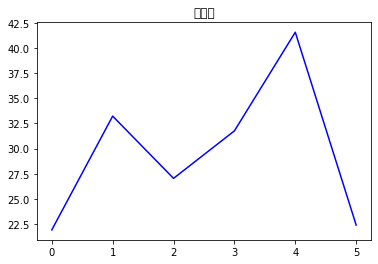

[36.0, 47.0, 30.0, 25.0, 38.0, 58.0, 35.0, 32.0, 35.0, 47.0, 19.0, 17.0, 29.0, 32.0, 26.0, 9.0, 14.0, 16.0, 35.0, 46.0, 38.0, 18.0, 15.0, 25.0, 37.0, 20.0, 19.0, 21.0, 26.0, 33.0, 31.0, 24.0, 13.0, 7.0, 18.0, 37.0, 28.0, 25.0, 17.0, 24.0, 32.0, 27.0, 33.0, 24.0, 19.0, 18.0, 13.0, 10.0, 12.0, 16.0, 20.0, 20.0, 24.0, 22.0, 19.0, 20.0, 22.0, 28.0, 44.0, 31.0, 22.0]
predicted = 21.386388, expected = 20.000000
predicted = 29.598165, expected = 22.000000
predicted = 24.489157, expected = 28.000000
predicted = 29.726263, expected = 44.000000
predicted = 38.458256, expected = 31.000000
predicted = 21.619683, expected = 22.000000


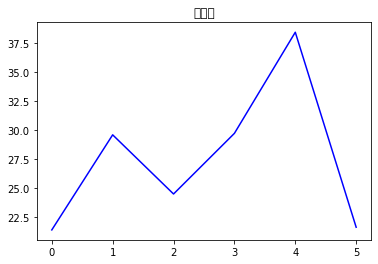

[34.0, 49.0, 31.0, 25.0, 41.0, 60.0, 31.0, 40.0, 40.0, 54.0, 17.0, 21.0, 29.0, 39.0, 24.0, 11.0, 16.0, 13.0, 40.0, 46.0, 36.0, 28.0, 19.0, 28.0, 38.0, 21.0, 19.0, 24.0, 26.0, 34.0, 35.0, 26.0, 13.0, 8.0, 22.0, 39.0, 29.0, 21.0, 17.0, 24.0, 30.0, 32.0, 31.0, 19.0, 18.0, 21.0, 17.0, 15.0, 13.0, 21.0, 23.0, 26.0, 29.0, 29.0, 23.0, 19.0, 26.0, 31.0, 45.0, 24.0, 22.0]
predicted = 23.338932, expected = 19.000000
predicted = 30.861544, expected = 26.000000
predicted = 25.626392, expected = 31.000000
predicted = 31.323238, expected = 45.000000
predicted = 33.088997, expected = 24.000000
predicted = 20.357450, expected = 22.000000


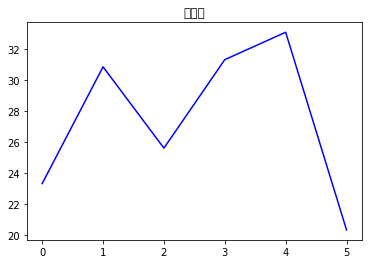

[37.0, 49.0, 33.0, 23.0, 39.0, 59.0, 35.0, 38.0, 38.0, 51.0, 21.0, 22.0, 33.0, 37.0, 26.0, 10.0, 16.0, 17.0, 40.0, 45.0, 40.0, 20.0, 16.0, 28.0, 38.0, 21.0, 18.0, 24.0, 30.0, 36.0, 34.0, 24.0, 13.0, 7.0, 18.0, 40.0, 29.0, 23.0, 17.0, 24.0, 31.0, 27.0, 31.0, 23.0, 20.0, 20.0, 14.0, 12.0, 15.0, 18.0, 18.0, 21.0, 26.0, 25.0, 20.0, 20.0, 27.0, 31.0, 47.0, 28.0, 23.0]
predicted = 23.094212, expected = 20.000000
predicted = 32.049678, expected = 27.000000
predicted = 27.061546, expected = 31.000000
predicted = 32.536892, expected = 47.000000
predicted = 37.869175, expected = 28.000000
predicted = 21.653677, expected = 23.000000


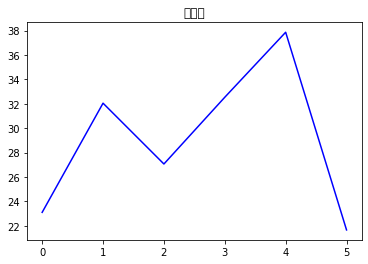

[35.0, 46.0, 30.0, 25.0, 42.0, 59.0, 33.0, 39.0, 39.0, 51.0, 21.0, 21.0, 31.0, 37.0, 24.0, 9.0, 15.0, 15.0, 39.0, 45.0, 38.0, 21.0, 18.0, 30.0, 37.0, 20.0, 18.0, 25.0, 30.0, 34.0, 35.0, 26.0, 12.0, 7.0, 19.0, 40.0, 26.0, 23.0, 17.0, 24.0, 29.0, 29.0, 31.0, 23.0, 19.0, 18.0, 15.0, 12.0, 13.0, 19.0, 20.0, 22.0, 26.0, 26.0, 20.0, 20.0, 27.0, 32.0, 47.0, 28.0, 23.0]
predicted = 23.399035, expected = 20.000000
predicted = 32.129467, expected = 27.000000
predicted = 26.653318, expected = 32.000000
predicted = 33.194292, expected = 47.000000
predicted = 38.275144, expected = 28.000000
predicted = 22.021433, expected = 23.000000


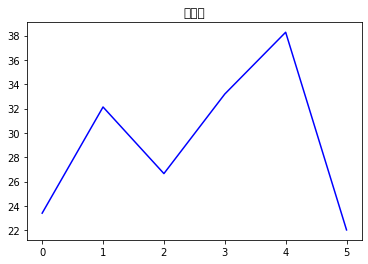

[40.0, 57.0, 34.0, 28.0, 45.0, 68.0, 38.0, 46.0, 44.0, 58.0, 21.0, 24.0, 34.0, 45.0, 29.0, 13.0, 21.0, 20.0, 50.0, 53.0, 46.0, 24.0, 21.0, 33.0, 41.0, 23.0, 21.0, 26.0, 31.0, 39.0, 38.0, 28.0, 17.0, 9.0, 21.0, 44.0, 38.0, 28.0, 19.0, 27.0, 36.0, 33.0, 41.0, 27.0, 23.0, 22.0, 17.0, 15.0, 15.0, 22.0, 26.0, 28.0, 32.0, 34.0, 23.0, 24.0, 31.0, 34.0, 52.0, 30.0, 26.0]
predicted = 25.050538, expected = 24.000000
predicted = 37.401783, expected = 31.000000
predicted = 29.833287, expected = 34.000000
predicted = 35.615618, expected = 52.000000
predicted = 41.357723, expected = 30.000000
predicted = 25.576726, expected = 26.000000


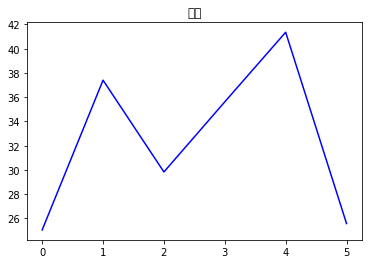

[38.0, 51.0, 35.0, 25.0, 39.0, 63.0, 36.0, 33.0, 37.0, 52.0, 22.0, 19.0, 32.0, 38.0, 30.0, 11.0, 17.0, 18.0, 40.0, 51.0, 44.0, 21.0, 16.0, 28.0, 43.0, 22.0, 20.0, 23.0, 31.0, 37.0, 34.0, 24.0, 13.0, 10.0, 19.0, 42.0, 31.0, 30.0, 18.0, 26.0, 35.0, 28.0, 37.0, 27.0, 23.0, 22.0, 16.0, 12.0, 14.0, 17.0, 19.0, 22.0, 26.0, 24.0, 22.0, 25.0, 26.0, 32.0, 50.0, 33.0, 26.0]
predicted = 26.681707, expected = 25.000000
predicted = 35.306507, expected = 26.000000
predicted = 28.041458, expected = 32.000000
predicted = 34.154074, expected = 50.000000
predicted = 42.319512, expected = 33.000000
predicted = 23.923911, expected = 26.000000


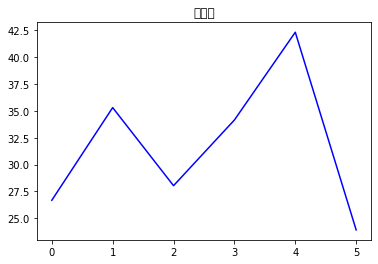

In [15]:
# ADF test와 KPSS test를 전부 통과하는 데이터를 가지고 arima를 돌려보도록 하자.
# ADF test: 시계열이 안정적(Stationary)인지 여부를 확인하는데 이용하는 것.
# KPSS test: 시계열이 평균 또는 선형 추세 주변에 고정되어 있는지 또는 단위 루트(unit root)로 인해 고정되지 않았는지? 확인하는 것.
for i in df.columns[:-1]:
# index를 datetime으로 변환시켜준다.
  df.index = df['ds']
  size = 6
  train, test = df[i][:-6], df[i][-6:]
  history = [x for x in df[i]]
  print(history)

  prediction = list()

  for t in range(len(test)):
    model = ARIMA(history, order = (5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    prediction.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted = %f, expected = %f'%(yhat, obs))

  # rmse = np.sqrt(mean_squared_error(test, prediction))
  # print('TEST RMSE: %.3f'%rmse)

  # pyplot.plot()
  pyplot.plot(prediction, color='blue')
  plt.title(f'{i}')
  pyplot.show()

In [16]:
!pip install pmdarima

     |████████████████████████████████| 1.5 MB 3.9 MB/s 
     |████████████████████████████████| 9.5 MB 17.7 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [24]:
df.tail()

,광진구,노원구,마포구,성동구,용산구,중구,중랑구,ds
ds,,,,,,,,
2021-07-27,26.0,22.0,26.0,27.0,27.0,31.0,26.0,2021-07-27
2021-07-28,31.0,28.0,31.0,31.0,32.0,34.0,32.0,2021-07-28
2021-07-29,48.0,44.0,45.0,47.0,47.0,52.0,50.0,2021-07-29
2021-07-30,32.0,31.0,24.0,28.0,28.0,30.0,33.0,2021-07-30
2021-07-31,22.0,22.0,22.0,23.0,23.0,26.0,26.0,2021-07-31


In [54]:
visualize_data = pd.read_csv('/content/drive/MyDrive/Proj_WT/DataSets/airpolution/2021seoul.csv')
visualize_data

,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
0,21.0,29.0,32.0,25.0,21.0,25.0,23.0,28.0,29.0,21.0,22.0,26.0,22.0,20.0,21.0,22.0,23.0,24.0,27.0,22.0,32.0,22.0,30.0,29.0,26.0
1,25.0,34.0,37.0,31.0,25.0,27.0,30.0,32.0,32.0,27.0,26.0,32.0,26.0,24.0,30.0,25.0,26.0,28.0,31.0,25.0,41.0,30.0,34.0,34.0,30.0
2,30.0,42.0,45.0,38.0,31.0,35.0,37.0,39.0,40.0,30.0,30.0,39.0,31.0,28.0,31.0,30.0,32.0,34.0,39.0,30.0,47.0,32.0,39.0,41.0,36.0
3,32.0,44.0,43.0,41.0,31.0,33.0,39.0,41.0,42.0,33.0,32.0,39.0,32.0,27.0,36.0,33.0,35.0,37.0,40.0,33.0,46.0,31.0,40.0,43.0,36.0
4,23.0,29.0,31.0,27.0,23.0,24.0,30.0,30.0,32.0,21.0,23.0,30.0,22.0,20.0,28.0,24.0,27.0,23.0,29.0,26.0,34.0,25.0,30.0,29.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,34.0,28.0,32.0,37.0,37.0,31.0,24.0,37.0,28.0,29.0,30.0,38.0,31.0,24.0,31.0,31.0,32.0,32.0,37.0,33.0,32.0,27.0,28.0,34.0,32.0
209,50.0,46.0,45.0,46.0,49.0,48.0,39.0,45.0,44.0,43.0,46.0,48.0,45.0,35.0,46.0,47.0,48.0,53.0,48.0,46.0,47.0,41.0,43.0,52.0,50.0
210,30.0,30.0,26.0,21.0,26.0,32.0,19.0,25.0,31.0,28.0,27.0,28.0,24.0,19.0,28.0,28.0,29.0,34.0,24.0,23.0,28.0,25.0,25.0,30.0,33.0
211,24.0,21.0,22.0,20.0,25.0,22.0,15.0,21.0,22.0,23.0,22.0,25.0,22.0,16.0,22.0,23.0,21.0,24.0,24.0,23.0,23.0,19.0,21.0,26.0,26.0


In [35]:
df = df.reset_index(drop = True)

In [63]:
from datetime import timedelta

In [69]:
what = pd.to_datetime('2021-01-01')
what + timedelta(days = 212)
# for i in range(213):



Timestamp('2021-08-01 00:00:00')

In [57]:
df

,측정일시,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
0,2021-01-01,21.0,29.0,32.0,25.0,21.0,25.0,23.0,28.0,29.0,21.0,22.0,26.0,22.0,20.0,21.0,22.0,23.0,24.0,27.0,22.0,32.0,22.0,30.0,29.0,26.0
1,2021-01-02,25.0,34.0,37.0,31.0,25.0,27.0,30.0,32.0,32.0,27.0,26.0,32.0,26.0,24.0,30.0,25.0,26.0,28.0,31.0,25.0,41.0,30.0,34.0,34.0,30.0
2,2021-01-03,30.0,42.0,45.0,38.0,31.0,35.0,37.0,39.0,40.0,30.0,30.0,39.0,31.0,28.0,31.0,30.0,32.0,34.0,39.0,30.0,47.0,32.0,39.0,41.0,36.0
3,2021-01-04,32.0,44.0,43.0,41.0,31.0,33.0,39.0,41.0,42.0,33.0,32.0,39.0,32.0,27.0,36.0,33.0,35.0,37.0,40.0,33.0,46.0,31.0,40.0,43.0,36.0
4,2021-01-05,23.0,29.0,31.0,27.0,23.0,24.0,30.0,30.0,32.0,21.0,23.0,30.0,22.0,20.0,28.0,24.0,27.0,23.0,29.0,26.0,34.0,25.0,30.0,29.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,2021-07-28,34.0,28.0,32.0,37.0,37.0,31.0,24.0,37.0,28.0,29.0,30.0,38.0,31.0,24.0,31.0,31.0,32.0,32.0,37.0,33.0,32.0,27.0,28.0,34.0,32.0
209,2021-07-29,50.0,46.0,45.0,46.0,49.0,48.0,39.0,45.0,44.0,43.0,46.0,48.0,45.0,35.0,46.0,47.0,48.0,53.0,48.0,46.0,47.0,41.0,43.0,52.0,50.0
210,2021-07-30,30.0,30.0,26.0,21.0,26.0,32.0,19.0,25.0,31.0,28.0,27.0,28.0,24.0,19.0,28.0,28.0,29.0,34.0,24.0,23.0,28.0,25.0,25.0,30.0,33.0
211,2021-07-31,24.0,21.0,22.0,20.0,25.0,22.0,15.0,21.0,22.0,23.0,22.0,25.0,22.0,16.0,22.0,23.0,21.0,24.0,24.0,23.0,23.0,19.0,21.0,26.0,26.0


In [58]:
visualize_data['측정일자'] = df['측정일시']

In [59]:
visualize_data

,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,측정일자
0,21.0,29.0,32.0,25.0,21.0,25.0,23.0,28.0,29.0,21.0,22.0,26.0,22.0,20.0,21.0,22.0,23.0,24.0,27.0,22.0,32.0,22.0,30.0,29.0,26.0,2021-01-01
1,25.0,34.0,37.0,31.0,25.0,27.0,30.0,32.0,32.0,27.0,26.0,32.0,26.0,24.0,30.0,25.0,26.0,28.0,31.0,25.0,41.0,30.0,34.0,34.0,30.0,2021-01-02
2,30.0,42.0,45.0,38.0,31.0,35.0,37.0,39.0,40.0,30.0,30.0,39.0,31.0,28.0,31.0,30.0,32.0,34.0,39.0,30.0,47.0,32.0,39.0,41.0,36.0,2021-01-03
3,32.0,44.0,43.0,41.0,31.0,33.0,39.0,41.0,42.0,33.0,32.0,39.0,32.0,27.0,36.0,33.0,35.0,37.0,40.0,33.0,46.0,31.0,40.0,43.0,36.0,2021-01-04
4,23.0,29.0,31.0,27.0,23.0,24.0,30.0,30.0,32.0,21.0,23.0,30.0,22.0,20.0,28.0,24.0,27.0,23.0,29.0,26.0,34.0,25.0,30.0,29.0,26.0,2021-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,34.0,28.0,32.0,37.0,37.0,31.0,24.0,37.0,28.0,29.0,30.0,38.0,31.0,24.0,31.0,31.0,32.0,32.0,37.0,33.0,32.0,27.0,28.0,34.0,32.0,2021-07-28
209,50.0,46.0,45.0,46.0,49.0,48.0,39.0,45.0,44.0,43.0,46.0,48.0,45.0,35.0,46.0,47.0,48.0,53.0,48.0,46.0,47.0,41.0,43.0,52.0,50.0,2021-07-29
210,30.0,30.0,26.0,21.0,26.0,32.0,19.0,25.0,31.0,28.0,27.0,28.0,24.0,19.0,28.0,28.0,29.0,34.0,24.0,23.0,28.0,25.0,25.0,30.0,33.0,2021-07-30
211,24.0,21.0,22.0,20.0,25.0,22.0,15.0,21.0,22.0,23.0,22.0,25.0,22.0,16.0,22.0,23.0,21.0,24.0,24.0,23.0,23.0,19.0,21.0,26.0,26.0,2021-07-31


In [60]:
visualize_data.to_csv('/content/drive/MyDrive/Proj_WT/DataSets/airpolution/visualize_data.csv', index = False, encoding = 'utf-8')

In [ ]:
import pmdarima as pm
from pmdarima import auto_arima
# comp = pd.DataFrame(columns=['Test', 'Forecast'])
# for i in df.columns[:-1]:  
  
  
for idx, i in enumerate(visualize_data.columns[:-1]):  
  model_ar = auto_arima(visualize_data[i], trace=True, error_action='ignore', suppress_warnings=True)
  model_ar.fit(visualize_data[i])
  print(f'{i}')
  globals()[f'{i}'] = pd.Series(model_ar.predict(n_periods=test.shape[0]), name=i)
  if idx == 0:
    DF = pd.DataFrame(globals()[f'{i}'].T)
  else:
    new = pd.DataFrame(globals()[f'{i}'].T)
    DF = pd.concat([DF, new], axis=1)
# DF = DF.T
DF

In [ ]:
DF.to_csv('/content/drive/MyDrive/Proj_WT/DataSets/airpolution/plotly.csv', encoding = 'utf-8', index = False)

In [ ]:
visualize_data['ds'] = df['ds']

In [ ]:
visualize_data

In [ ]:
import pmdarima as pm
from pmdarima import auto_arima
for i in visualize_data.columns[:-1]:  
  model_ar = auto_arima(visualize_data[i], trace=True, error_action='ignore', suppress_warnings=True)
  model_ar.fit(visualize_data[i])
  forecast = model_ar.predict(n_periods=test.shape[0])
  print(f'{i}' ,mean_squared_error(test, forecast)**0.5)
  print(f'{i}', r2_score(test, forecast))

  # 가장 좋은 p,d,q를 가지고 미래의 6일을 예측한다.
  pyplot.plot(prediction, color='blue')
  plt.title(f'{i}')
  pyplot.show()

In [ ]:
DF.to_csv('/content/drive/MyDrive/Proj_WT/DataSets/airpolution/plotly.csv', index = False, encoding = 'utf-8')

In [ ]:
# auto arima를 사용하여 최고의 p, d, q를 구한다.
# auto arima에서는 AIC를 기준으로 최적의 p, d, q를 찾는다.
import pmdarima as pm
from pmdarima import auto_arima
pd.DataFrame()
for i in df.columns[:-1]:  
  model_ar = auto_arima(df[i], trace=True, error_action='ignore', suppress_warnings=True)
  model_ar.fit(df[i])
  forecast = model_ar.predict(n_periods=test.shape[0])
  print(f'{i}' ,mean_squared_error(test, forecast)**0.5)
  print(f'{i}', r2_score(test, forecast))

  # 가장 좋은 p,d,q를 가지고 미래의 6일을 예측한다.
  pyplot.plot(prediction, color='blue')
  plt.title(f'{i}')
  pyplot.show()

# 서울시 구별 데이터 시각화

In [ ]:
import requests
import json
import pandas as pd
from pandas.io.json import json_normalize

import os
import webbrowser
import folium
from folium import plugins
print(folium.__version__)

In [ ]:
for i in df.columns[:-1]:
  print(round(df[i].mean(),2))

In [ ]:
prediction

In [ ]:
print(df)

In [ ]:
# df.columns
test_data = pd.DataFrame(df.columns[:-1], columns = ['name'])
test_data['values'] = [31.69,27.31,25.87,27.57,28.77,27.13,27.08]

In [ ]:
test_data

In [ ]:
df[['ds','중구','성동구','노원구','마포구','중랑구','용산구','광진구']]

In [ ]:
import re
test_data['name'] = test_data['name'].apply(lambda x: re.compile('[가-힣]+').findall(x)[0])

geo_json = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'
# geo_str = json.load(open(geo_json, encoding = 'utf-8'))
# geo_str
# 데이터 로드하기
m = folium.Map(
    location = [37.566345, 126.977893],
    tiles = 'Stamen Terrain'
)

folium.Choropleth(
    geo_data = geo_json,
    name = 'choropleth',
    data = test_data,
    columns = ['name','values'],
    key_on = 'feature.properties.name',
    fill_color = 'Greens',
    fill_opacity = 0.7,
    line_opacity = 0.2).add_to(m)

In [ ]:
m

In [ ]:
import plotly.express as px

# geometry_gj = json.load(open(geo_json, encoding='utf-8'))

fig = px.choropleth(test_data, geojson=geo_json, locations='name',
                                featureidkey='feature.properties.name')
# fig.update_geos(fitbounds="name", visible=True)
fig.update_layout(title_text='용인시 법정동 별 자가용 등록 대수', title_font_size=20)

In [ ]:
import plotly
print(plotly.__version__)

In [ ]:
#  pip install -U plotly